In [1]:
import sys
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
from models.Other_ML_techniques import ClassifierEvaluator

In [2]:
dataset = pd.read_csv("C:/Users/ruben/OneDrive/Desktop/Datasets/final_dataset.csv")

In [3]:
length_training_data = 953192
train = dataset[:length_training_data]
test = dataset[length_training_data:]

X_train = train.drop(columns=['is_fraud', 'index', 'cc_user', 'merchant_num'])
y_train = train['is_fraud']

X_test = test.drop(columns=['is_fraud', 'index', 'cc_user', 'merchant_num'])
y_test = test['is_fraud']

In [ ]:
evaluator = ClassifierEvaluator(X_train, y_train, X_test, y_test)

rf_model = evaluator.train_random_forest()
rf_metrics = evaluator.evaluate_random_forest()

print("Optimal Random Forest Configuration:")
print(evaluator.grid_search_rf.best_params_)

lr_model = evaluator.train_logistic_regression()
lr_metrics = evaluator.evaluate_logistic_regression()

print("Optimal Logistic Regression Configuration:")
print(evaluator.grid_search_lr.best_params_)

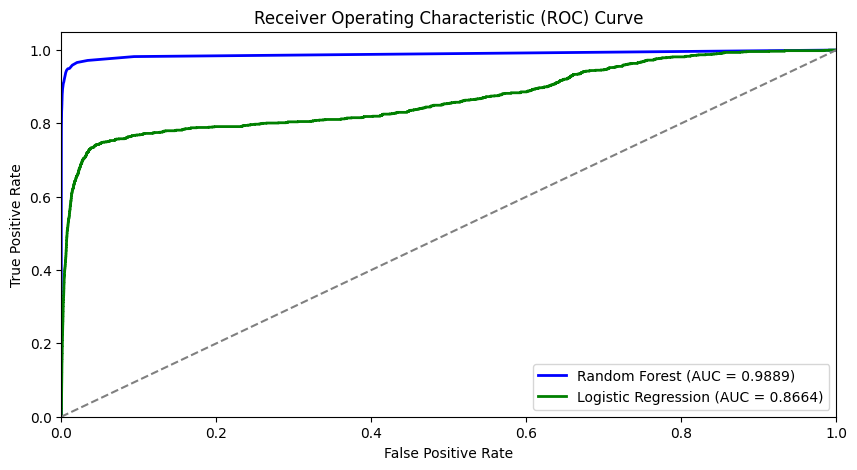

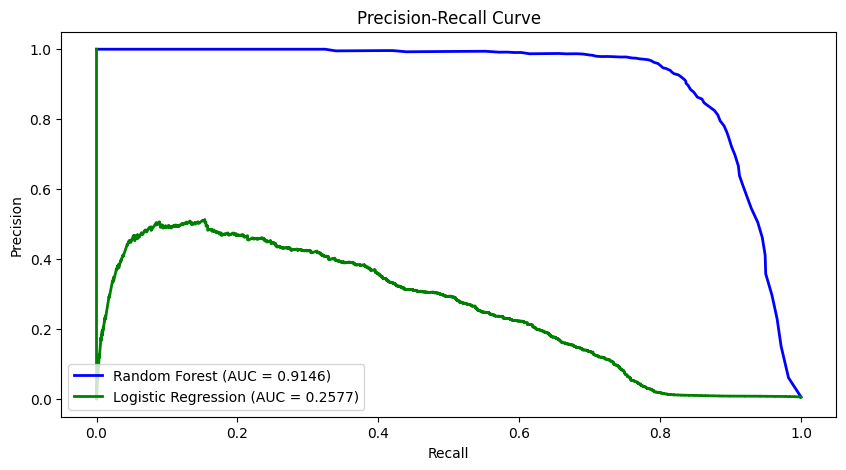

In [14]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = average_precision_score(y_test, y_proba_lr)

plt.figure(figsize=(10, 5))

plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.4f)' % roc_auc_rf)

plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = %0.4f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(10, 5))

plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Random Forest (AUC = %0.4f)' % pr_auc_rf)

plt.plot(recall_lr, precision_lr, color='green', lw=2, label='Logistic Regression (AUC = %0.4f)' % pr_auc_lr)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()